In [76]:
import numpy as np
import matplotlib.pyplot as plt

In [77]:
num_nodes = 3
num_elements = 1 #cst element
num_materials = 1
problem_type = 21 #plane stress
thickness = 1
num_load_bc = 1 #number of lolads applied
num_disp_bc = 2 #number of places displacement condition is applied
dofpn = 2 #degrees of freedom per node
tdof = num_nodes*dofpn #total degrees of freedom

In [78]:
COORD = np.loadtxt(fname = 'D:\\DATA\\COORD.txt').astype(np.float32)
NCA = np.loadtxt(fname = 'D:\\DATA\\NCA.txt').astype(np.int64)
MAT = np.loadtxt(fname = 'D:\DATA\MAT.txt').astype(np.float32)
LOAD_BC = np.loadtxt(fname = 'D:\DATA\LOAD_BC.txt').astype(np.float32)
DISP_BC = np.loadtxt(fname = 'D:\DATA\DISP_BC.txt').astype(np.float32)
#N1 = NCA[1][1]
#print(N1)

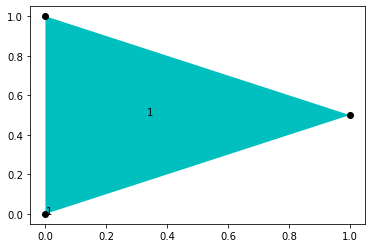

In [79]:
for ele in range(1,2):
    
    # Nodes for each element from 1 to 6
    
    N1=NCA[ele,1]
    N2=NCA[ele,2]
    N3=NCA[ele,3]
    
    # Nodal coordinates for each element from 1 to 6
    
    X1N1=COORD[N1,1]
    X2N1=COORD[N1,2]
    X1N2=COORD[N2,1]
    X2N2=COORD[N2,2]
    X1N3=COORD[N3,1]
    X2N3=COORD[N3,2]
    
    #Assigning material for each element
    
    Mat_num=NCA[ele,4]
    
    #Verification of the geometry of the problem by plotting all the elements and nodes
    
    X=[X1N1,X1N2,X1N3]
    Y=[X2N1,X2N2,X2N3]
    CGX=(X1N1+X1N2+X1N3)/3
    CGY=(X2N1+X2N2+X2N3)/3
    if Mat_num==1:
        plt.fill(X,Y,'c')
    else:
        plt.fill(X,Y,'y')
    plt.scatter(X,Y,c='black')
    plt.text(CGX,CGY,str(ele))
    plt.text(X1N1,X2N1,str(N1))

In [80]:
GSTIFF=np.zeros((tdof,tdof)) # initialisition of Global stiffness matrix with all elements equal to zero
F=np.zeros(tdof) # initialisation of force matrix
print(GSTIFF)
print(F)

[[0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0.]]
[0. 0. 0. 0. 0. 0.]


In [81]:
for ele in range(1,2):
    
    # Nodes for each element from 1 to 6
    
    N1=NCA[ele,1]
    N2=NCA[ele,2]
    N3=NCA[ele,3]
    
    # Nodal coordinates for each element from 1 to 6
    
    X1N1=COORD[N1,1]
    X2N1=COORD[N1,2]
    X1N2=COORD[N2,1]
    X2N2=COORD[N2,2]
    X1N3=COORD[N3,1]
    X2N3=COORD[N3,2]
    
    two_delta_matrix = np.array([[1,X1N1,X2N1],[1,X1N2,X2N2],[1,X1N3,X2N3]]) #creating 2delta matrix
    two_delta = np.linalg.det(two_delta_matrix) #calculating det of the matrix
    
    #calculation of B matrix
    
    B1 = X2N2-X2N3 #calculation of Beta values
    B2 = X2N3-X2N1
    B3 = X2N1-X2N2
    G1 = X1N3-X1N2 #calculation of Gamma values
    G2 = X1N1-X1N3
    G3 = X1N2-X1N1
    B = np.zeros((3,6)) #initialisation of B matrix to Zero
    B[0,0] = B1 
    B[0,2] = B2
    B[0,4] = B3
    B[1,1] = G1
    B[1,3] = G2
    B[1,5] = G3
    B[2,0] = G1
    B[2,1] = B1
    B[2,2] = G2
    B[2,3] = B2
    B[2,4] = G3
    B[2,5] = B3
    B=B/two_delta #calculation if B matrix
    
    Mat_num=NCA[ele,4]
    E = MAT[Mat_num,1]
    PR = MAT[Mat_num,2]
    CONST = E/(1-PR**2)
    D = np.zeros((3,3))
    D[0,0] = 1
    D[0,1] = PR
    D[1,0] = PR
    D[1,1] = 1
    D[2,2] = (1-PR)/2
    D=D*CONST
    
    ESTIFF=B.transpose()@D@B*thickness*two_delta*0.5 # Element stiffness matrix
    
    #Assembly of Global Stiffness Matrix
    
    CN=[2*N1-2,2*N1-1,2*N2-2,2*N2-1,2*N3-2,2*N3-1]
    CN_IDX=np.array(6*CN).reshape(6,6)
    RN_IDX=CN_IDX.transpose()
    GSTIFF[RN_IDX,CN_IDX]=GSTIFF[RN_IDX,CN_IDX]+ESTIFF
print(GSTIFF)
    
    
    
    

[[-0.33854167 -0.15625     0.078125   -0.05208333  0.26041667  0.20833333]
 [-0.15625    -0.57291667  0.05208333  0.46875     0.10416667  0.10416667]
 [ 0.078125    0.05208333 -0.33854167  0.15625     0.26041667 -0.20833333]
 [-0.05208333  0.46875     0.15625    -0.57291667 -0.10416667  0.10416667]
 [ 0.26041667  0.10416667  0.26041667 -0.10416667 -0.52083333  0.        ]
 [ 0.20833333  0.10416667 -0.20833333  0.10416667  0.         -0.20833333]]


In [82]:
for i in range (1,2):
    load_type = LOAD_BC[i,2]
    if load_type==1:
        N=int(LOAD_BC[i,1])
        F[(2*N-2)]=F[(2*N-2)]+LOAD_BC[i,3] #Assembly of Global Force Vector
    elif load_type==2:
        N=int(LOAD_BC[i,1])
        F[(2*N-1)]=F[(2*N-1)]+LOAD_BC[i,4]
    else:
        N=int(LOAD_BC[i,1])
        F[(2*N-2)]=F[(2*N-2)]+LOAD_BC[i,3]
        F[(2*N-1)]=F[(2*N-1)]+LOAD_BC[i,4]
print(F)

[0. 0. 0. 0. 1. 0.]


In [83]:
GSTIFFCOPY=GSTIFF.copy() #Creating a copy of Global Stiffness matrix for solving
print(GSTIFFCOPY)

[[-0.33854167 -0.15625     0.078125   -0.05208333  0.26041667  0.20833333]
 [-0.15625    -0.57291667  0.05208333  0.46875     0.10416667  0.10416667]
 [ 0.078125    0.05208333 -0.33854167  0.15625     0.26041667 -0.20833333]
 [-0.05208333  0.46875     0.15625    -0.57291667 -0.10416667  0.10416667]
 [ 0.26041667  0.10416667  0.26041667 -0.10416667 -0.52083333  0.        ]
 [ 0.20833333  0.10416667 -0.20833333  0.10416667  0.         -0.20833333]]


In [84]:
for i in range (1,3):
    disp_type = DISP_BC[i,2]
    print(int(disp_type))
    if disp_type==1:
        N=int(DISP_BC[i,1])
        F[(2*N-2)]=F[(2*N-2)]+(DISP_BC[i,3]*10**16)
        GSTIFFCOPY[2*N-2,2*N-2]=GSTIFFCOPY[2*N-2,2*N-2]+10**16
    elif disp_type==2:
        N=int(DISP_BC[i,1])
        F[(2*N-1)]=F[(2*N-1)]+(DISP_BC[i,4]*10**16)
        GSTIFFCOPY[2*N-1,2*N-1]=GSTIFFCOPY[2*N-1,2*N-1]+10**16
    else:
        N=int(DISP_BC[i,1])
        print(N)
        F[(2*N-2)]=F[(2*N-2)]+(DISP_BC[i,3]*10**16)
        GSTIFFCOPY[2*N-2,2*N-2]=GSTIFFCOPY[2*N-2,2*N-2]+10**16
        F[(2*N-1)]=F[(2*N-1)]+(DISP_BC[i,4]*10**16)
        GSTIFFCOPY[2*N-1,2*N-1]=GSTIFFCOPY[2*N-1,2*N-1]+10**16
print(F)
print(GSTIFFCOPY)

12
1
12
2
[0. 0. 0. 0. 1. 0.]
[[ 1.00000000e+16 -1.56250001e-01  7.81249993e-02 -5.20833322e-02
   2.60416667e-01  2.08333333e-01]
 [-1.56250001e-01  1.00000000e+16  5.20833322e-02  4.68750001e-01
   1.04166668e-01  1.04166666e-01]
 [ 7.81249993e-02  5.20833322e-02  1.00000000e+16  1.56250001e-01
   2.60416667e-01 -2.08333333e-01]
 [-5.20833322e-02  4.68750001e-01  1.56250001e-01  1.00000000e+16
  -1.04166668e-01  1.04166666e-01]
 [ 2.60416667e-01  1.04166668e-01  2.60416667e-01 -1.04166668e-01
  -5.20833334e-01  0.00000000e+00]
 [ 2.08333333e-01  1.04166666e-01 -2.08333333e-01  1.04166666e-01
   0.00000000e+00 -2.08333333e-01]]


In [85]:
DISP=np.linalg.solve(GSTIFFCOPY,F)
print(DISP.reshape(-1,2))


[[ 5.00000000e-17  2.00000003e-17]
 [ 5.00000000e-17 -2.00000003e-17]
 [-1.92000000e+00 -0.00000000e+00]]


In [92]:
import matplotlib.pyplot as plt
import numpy as np
import scipy.integrate as eval_int
from math import sin

In [104]:
n=int(input("Enter no.of dimensions : "))
b=[]

Enter no.of dimensions : 4


In [122]:
def base_fun_gen(p):
    base=lambda x:x**p
    return base
for i in range(n):
    b.append(base_fun_gen(i))
#K matrix
k=[]

    

In [129]:
from scipy.integrate import quad
from math import pi
b[0]
b[1]
for i in range(n):
    print(b[i]b[i+1])

SyntaxError: invalid syntax (1297890017.py, line 6)